# Solving the n-Queens Problem using Local Search

Student Name: Ritik Khandelwal

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [RK]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

In [ ]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Intially:
Board with 1 conflicts.


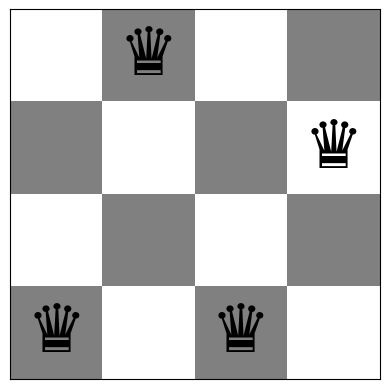

Queens (left to right) are at rows: [3 0 3 1]
Number of conflicts: 1



In [39]:
def steepest_hill_ascend(n, verb=True):
    # Initialize a random board
    rand_board = random_board(n)

    if verb:
        print("Intially:")
        show_board(rand_board)
        print(f"Queens (left to right) are at rows: {rand_board}")
        print(f"Number of conflicts: {conflicts(rand_board)}\n")

    # updating the board
    while True:
        current_conf = conflicts(rand_board)
        BestMove = None

        # to find the least number of conflicts
        for q_index in range(n):
            for new_pos in range(n):
                if new_pos != rand_board[q_index]:
                    board_new = rand_board.copy()
                    board_new[q_index] = new_pos
                    new_conf = conflicts(board_new)

                    if new_conf < current_conf:
                        best_move = (q_index, new_pos)
                        current_conf = new_conf

        if BestMove is None:
            # if verbose:
            #     print("No solution found")
            return rand_board

        # Update the board with the best move
        rand_board[BestMove[0]] = BestMove[1]

        if conflicts(rand_board) == 0:
            return rand_board

final_4 = steepest_hill_ascend(4)
# final_board_8 = steepest_hill_ascend(8)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Initially:
Board with 4 conflicts.


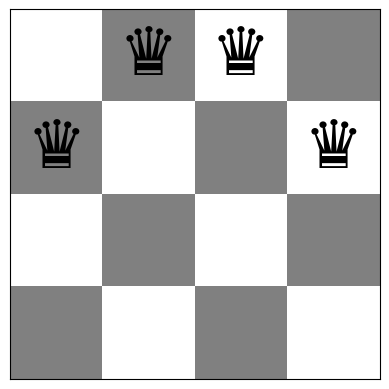

Queens (left to right) are at rows: [1 0 0 1]
Number of conflicts: 4

Final Board:
Board with 0 conflicts.


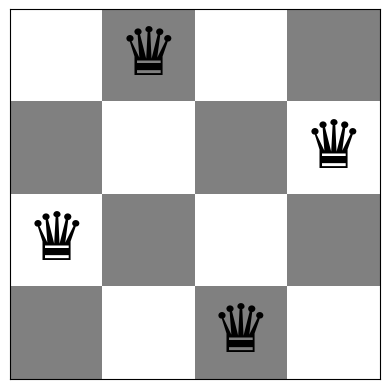

Initially:
Board with 7 conflicts.


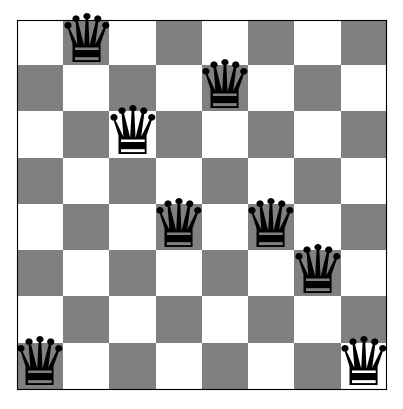

Queens (left to right) are at rows: [7 0 2 4 1 4 5 7]
Number of conflicts: 7

Final Board:
Board with 0 conflicts.


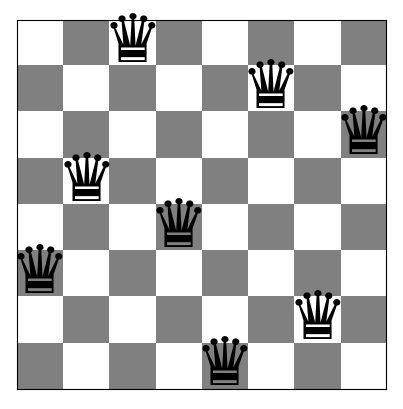

In [62]:
import numpy as np

def first_choice_hill_climbing_1(n, verb=True, max_it=1000):
    rand_board = random_board(n)

    if verb:
        print("Initially:")
        show_board(rand_board)
        print(f"Queens (left to right) are at rows: {rand_board}")
        print(f"Number of conflicts: {conflicts(rand_board)}\n")

    st = 0

    while st < max_it:
        current_conf = conflicts(rand_board)
        board_new = rand_board.copy()

        p = np.random.choice(list(range(n)))

        pat = list(range(n))
        pat.remove(rand_board[p])
        q = np.random.choice(pat)

        board_new[p] = q

        if np.array_equal(board_new, rand_board):
            st += 1
            continue

        new_conf = conflicts(board_new)

        if new_conf < current_conf or (
            new_conf == current_conf
            and np.random.random() < 1.0 / (1.0 + current_conf)
        ):
            rand_board = board_new

            if conflicts(rand_board) == 0:
                if verb:
                    print("Final Board:")
                    show_board(rand_board)
                return rand_board

        st += 1

    if verb:
        print("No solution after", max_it, "steps.")
    return rand_board

final_4 = first_choice_hill_climbing_1(4)
final_8 = first_choice_hill_climbing_1(8)


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Initially:
Board with 4 conflicts.


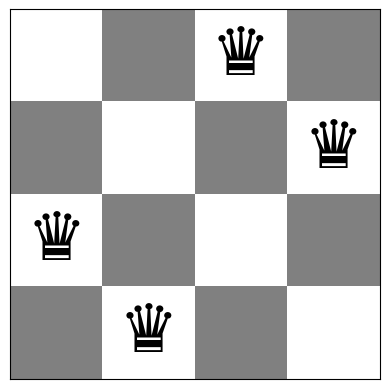

Queens (left to right) are at rows: [2 3 0 1]
Number of conflicts: 4

[0 2 3 1]
Board with 1 conflicts.


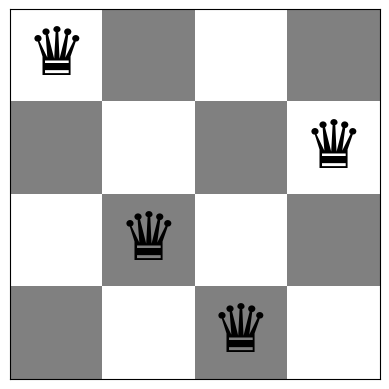

Initially:
Board with 8 conflicts.


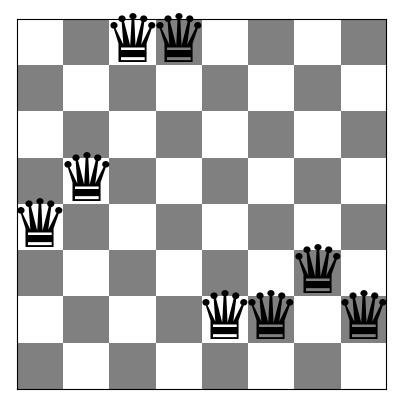

Queens (left to right) are at rows: [4 3 0 0 6 6 5 6]
Number of conflicts: 8

[4 7 0 3 1 2 5 6]
Board with 2 conflicts.


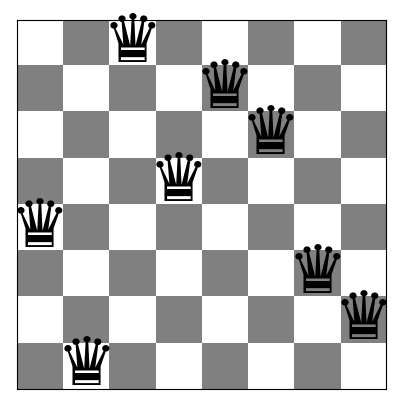

In [63]:
def stochastic_Hill_Climbing_2(n, verb=True):
    rand_board = random_board(n)

    if verb:
        print("Initially:")
        show_board(rand_board)
        print(f"Queens (left to right) are at rows: {rand_board}")
        print(f"Number of conflicts: {conflicts(rand_board)}\n")

    current_conflicts = conflicts(rand_board)

    while True:
        uphill_conflicts = []
        uphill_conf_array = [[-1] * len(rand_board) for _ in range(len(rand_board))]

        for i, q_pos in enumerate(rand_board):
            for j in range(len(rand_board)):
                if q_pos != j:
                    rand_board[i] = j
                    new_conf = conflicts(rand_board)

                    if new_conf < current_conflicts:
                        uphill_conflicts.append(new_conf)
                        uphill_conf_array[i][j] = new_conf

            rand_board[i] = q_pos

        if uphill_conflicts:
            new_rand_conflicts = np.random.choice(uphill_conflicts)
            if new_rand_conflicts < current_conflicts:
                index_to_change = (
                    np.where(uphill_conf_array == new_rand_conflicts)
                )
                rand_board[index_to_change[0][0]] = index_to_change[1][0]
                current_conflicts = new_rand_conflicts
            else:
                break
        else:
            break

    return rand_board

final_board_4 = stochastic_Hill_Climbing_2(4)
print(final_board_4)
show_board(final_board_4)
final_board_8 = stochastic_Hill_Climbing_2(8)
print(final_board_8)
show_board(final_board_8)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Took 99 restarts to find an optimal solution!
Final Board:
Board with 0 conflicts.


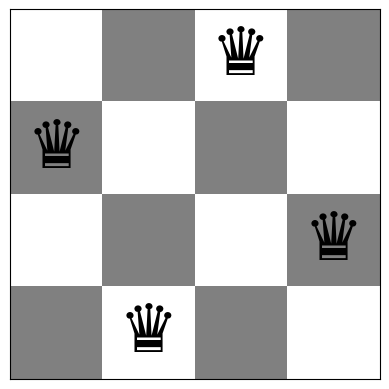

Number of conflicts: 0
Took 1 restart to find an optimal solution!
Final Board:
Board with 0 conflicts.


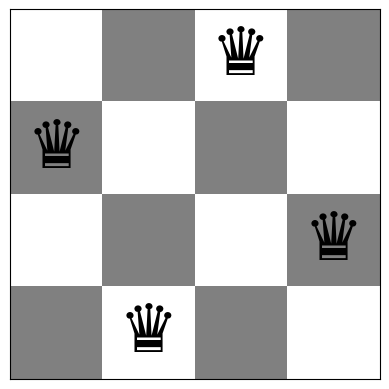

Number of conflicts: 0
Took 2 restarts to find an optimal solution!
Final Board:
Board with 0 conflicts.


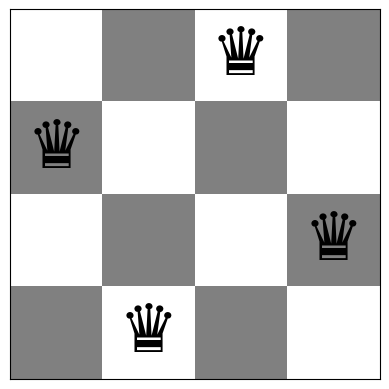

Number of conflicts: 0


In [66]:
def restarts_algo(algorithm, n, verb=True, number_restarts=100):
    final_board = None
    rstart = 0

    while rstart < number_restarts:
        final_board = algorithm(n, verb=False)
        number_conflicts = conflicts(final_board)

        if number_conflicts == 0:
            if verb:
                print("Took " + str(rstart + 1) + (" restart" if rstart == 0 else " restarts") + " to find an optimal solution!")
            break

        rstart += 1

    if rstart == number_restarts:
        if verb:
            print("No optimal solution after", number_restarts, "restarts.")

    if verb:
        print("Final Board:")
        show_board(final_board)
        print(f"Number of conflicts: {number_conflicts}")

    return final_board

# Example usage with different algorithms
f_bd_steepest = restarts_algo(steepest_hill_ascend,4 )
f_bd_first_choice = restarts_algo(first_choice_hill_climbing_1,4)
f_bd_stochastic = restarts_algo(stochastic_Hill_Climbing_2,4)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

[1 3 2 0]
Board with 1 conflicts.


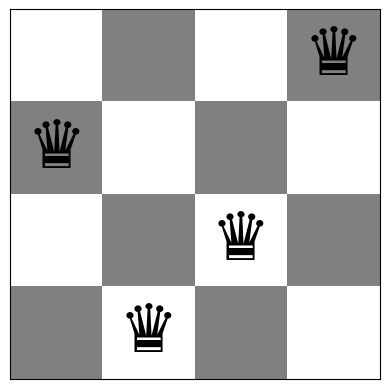

Queens (left to right) are at rows: [1 3 2 0]
Number of conflicts: 1
[2 0 3 1]
Board with 0 conflicts.


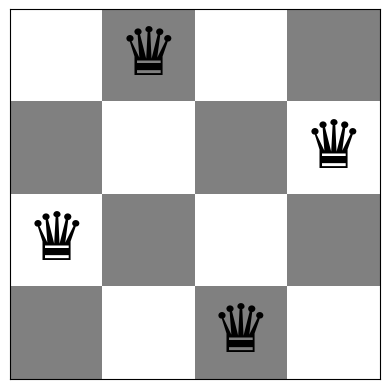

[5 1 3 7 0 0 7 2]
Board with 7 conflicts.


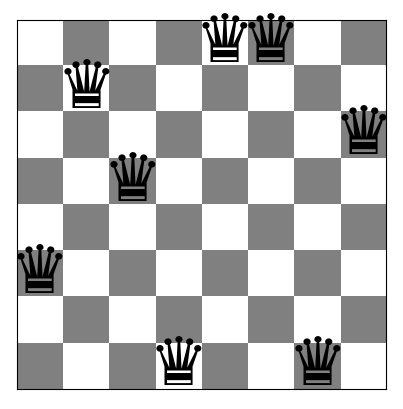

Queens (left to right) are at rows: [5 1 3 7 0 0 7 2]
Number of conflicts: 7
[2 6 3 7 4 1 3 5]
Board with 1 conflicts.


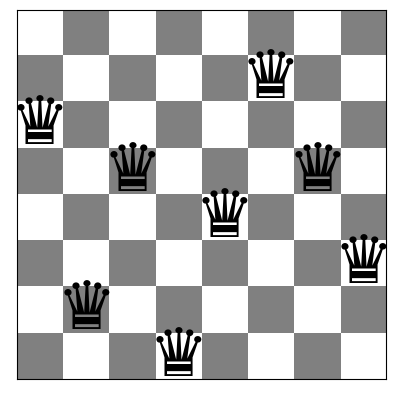

In [51]:
def conflicts_board(board, current_conflicts):
    """
    Generates a temporary board to store conflicts for each queen position change.
    """
    temp_conflicts_bd = [[-1] * len(board) for _ in range(len(board))]

    for p in range(len(board)):
        past_pos = board[p]
        for q in range(len(board)):
            board[p] = q
            temp_conflicts_bd[p][q] = conflicts(board)
        board[p] = past_pos

    return temp_conflicts_bd

def simulated_annealing(n, verb=True):
    """
    Implements simulated annealing to solve the n-Queens problem.
    """
    rand_board = random_board(n)
    current_conflicts = conflicts(rand_board)

    if verb:
        print(rand_board)
        show_board(rand_board)
        print(f"Queens (left to right) are at rows: {rand_board}")
        print(f"Number of conflicts: {conflicts(rand_board)}")

    initial_temp = 1.0
    current_temp = initial_temp
    steps = 0

    while current_temp > 1e-1:
        current_temp = initial_temp * (0.999) ** steps
        temp_board = conflicts_board(rand_board, current_conflicts)

        act = np.random.randint(0, n)
        bct = np.random.randint(0, n)
        new_conf = temp_board[act][bct]  # Retrieve the new conflicts value

        cost_change = new_conf - current_conflicts

        if cost_change <= 0 or np.random.rand() < np.exp(-cost_change / current_temp):
            # Accept the move
            rand_board[act] = bct
            current_conflicts = new_conf

        steps += 1

    return rand_board

final_board = simulated_annealing(4)
print(final_board)
show_board(final_board)
final_board = simulated_annealing(8)
print(final_board)
show_board(final_board)



The choice of the annealing schedule with a slow cooling rate and a temperature-based acceptance probability allows the algorithm to balance between exploration (accepting worse moves) and exploitation (converging to better solutions).

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Running Steepest Hill Ascend...


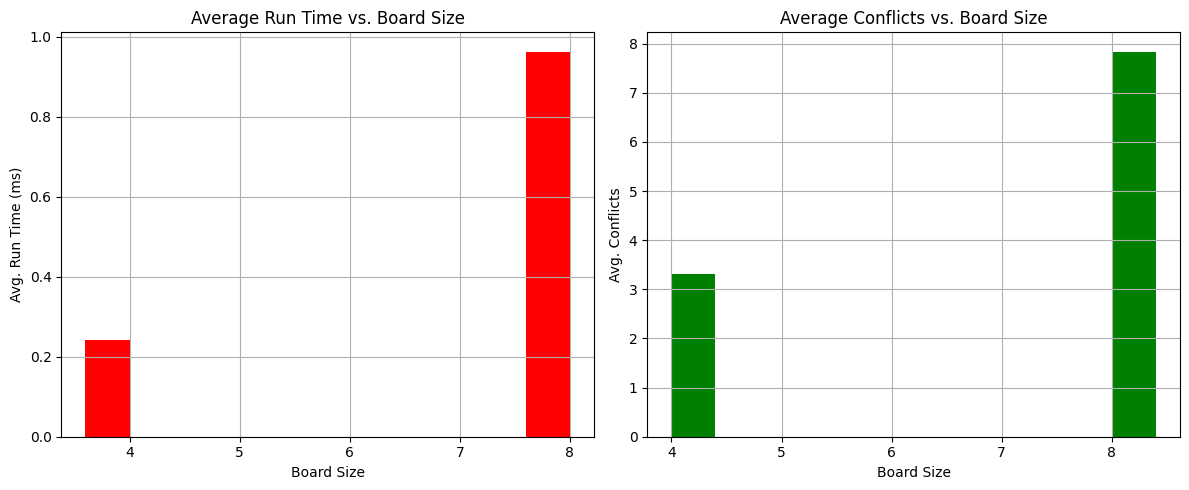

Running First Choice Hill Climbing...


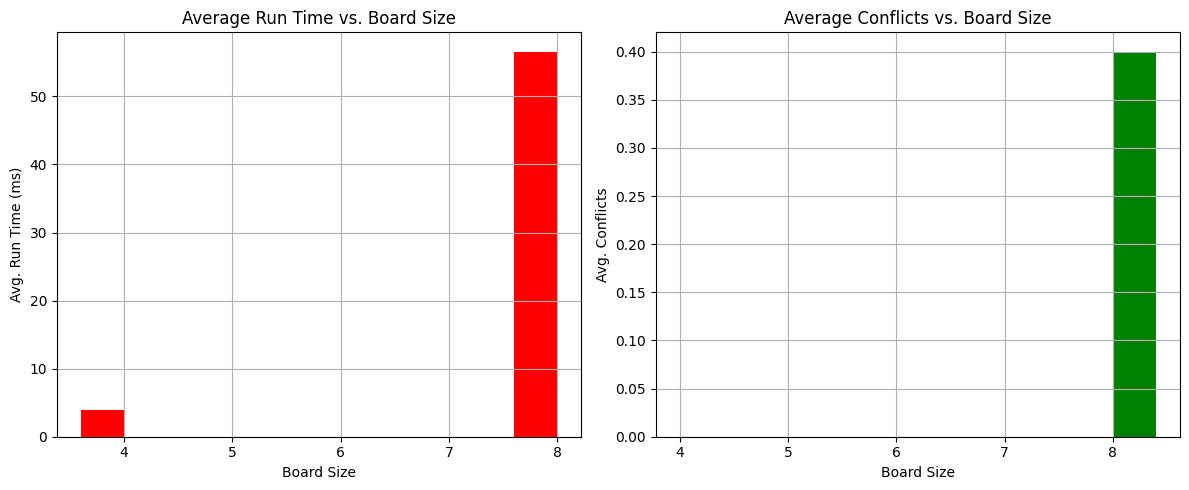

Running Stochastic Hill Climbing...


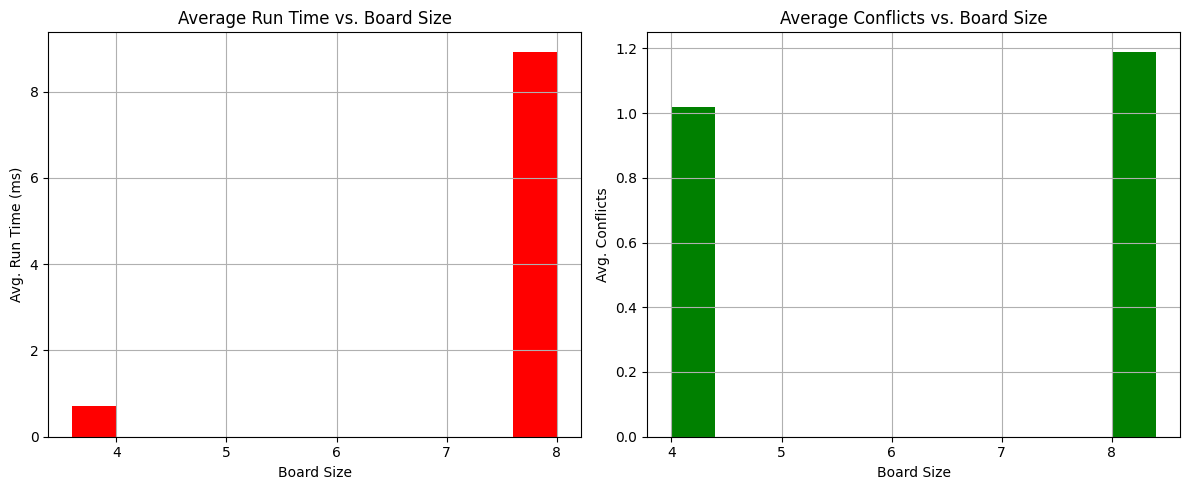

Running Simulated Annealing...


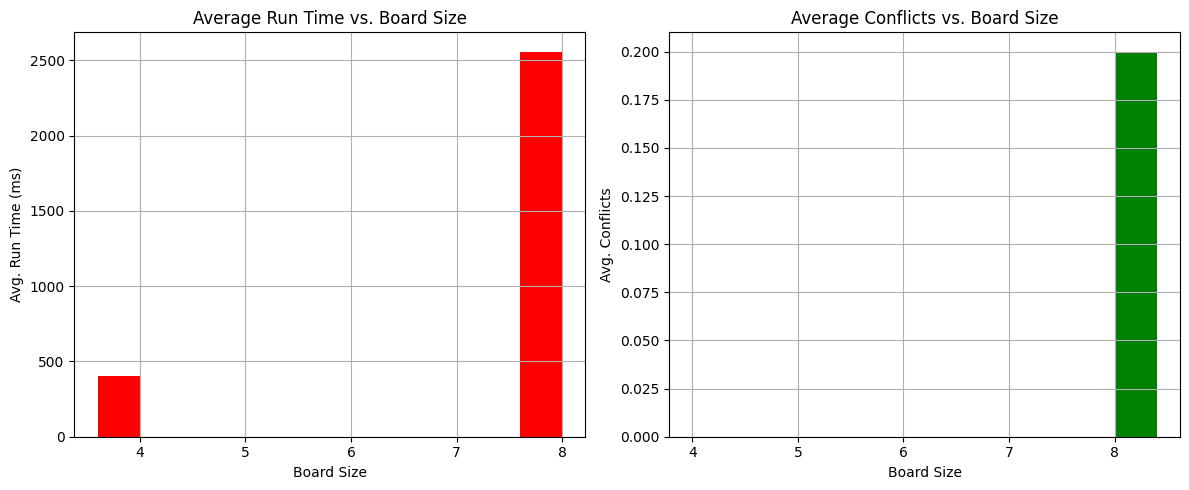


All Results:
  Steepest Hill Ascend                                                        \
            Board Size Avg. Run Time (ms) Avg. Conflicts % Optimal Solutions   
0                    4           0.242126           3.31                 0.0   
1                    8           0.963125           7.84                 0.0   

  First Choice Hill Climbing                                    \
                  Board Size Avg. Run Time (ms) Avg. Conflicts   
0                          4           3.883262            0.0   
1                          8          56.576130            0.4   

                      Stochastic Hill Climbing                     \
  % Optimal Solutions               Board Size Avg. Run Time (ms)   
0               100.0                        4           0.716562   
1                60.0                        8           8.929348   

                                     Simulated Annealing                     \
  Avg. Conflicts % Optimal Solutions        

In [73]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def visualize_search_algo(searchName, restartSearchName=None, verbose=False):
    color_in_runtime = 'red'
    color_in_objective = 'green'
    # Initialize variables
    N = 100  # Number of runs
    board_sizes = [4, 8]  # Initially run for sizes = 4,6,8,10 but then used board sizes as mentioned in question.
    data = {'Board Size': [], 'Avg. Run Time (ms)': [], 'Avg. Conflicts': [], '% Optimal Solutions': []}

    for n in board_sizes:
        run_times = []
        conflicts_list = []
        optimal_count = 0

        for _ in range(N):
            t_start = time.time()
            if restartSearchName:
                solution = searchName(restartSearchName, n, verb=False)
            else:
                solution = searchName(n, verb=False)
            t_end = time.time()

            run_time = (t_end - t_start) * 1000  # Convert to milliseconds
            num_conflicts = conflicts(solution)
            run_times.append(run_time)
            conflicts_list.append(num_conflicts)
            if num_conflicts == 0:
                optimal_count += 1

        avg_run_time = np.mean(run_times)
        avg_conflicts = np.mean(conflicts_list)
        optimal_percentage = (optimal_count / N) * 100

        data['Board Size'].append(n)
        data['Avg. Run Time (ms)'].append(avg_run_time)
        data['Avg. Conflicts'].append(avg_conflicts)
        data['% Optimal Solutions'].append(optimal_percentage)

    df = pd.DataFrame(data)

    # Create and display the plots
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(df['Board Size'] - 0.2, df['Avg. Run Time (ms)'], color=color_in_runtime, width=0.4)
    plt.xlabel('Board Size')
    plt.ylabel('Avg. Run Time (ms)')
    plt.title('Average Run Time vs. Board Size')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.bar(df['Board Size'] + 0.2, df['Avg. Conflicts'], color=color_in_objective, width=0.4)
    plt.xlabel('Board Size')
    plt.ylabel('Avg. Conflicts')
    plt.title('Average Conflicts vs. Board Size')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return df

# Example usage
search_algorithms = [
    ("Steepest Hill Ascend", steepest_hill_ascend),
    ("First Choice Hill Climbing", first_choice_hill_climbing_1),
    ("Stochastic Hill Climbing", stochastic_Hill_Climbing_2),
    ("Simulated Annealing", simulated_annealing)
]

dfs = {}
for algo_name, algo_func in search_algorithms:
    print(f"Running {algo_name}...")
    df_result = visualize_search_algo(algo_func)
    dfs[algo_name] = df_result

# Create a DataFrame to compare all algorithms
all_results_df = pd.concat(dfs.values(), axis=1, keys=dfs.keys())
print("\nAll Results:")
print(all_results_df)


# The largest board each algorithm can solve in a reasonable amount time is 8.(according to question)


In [74]:
all_results_df

Steepest Hill Ascend                                                        \
            Board Size Avg. Run Time (ms) Avg. Conflicts % Optimal Solutions   
0                    4           0.242126           3.31                 0.0   
1                    8           0.963125           7.84                 0.0   

  First Choice Hill Climbing                                    \
                  Board Size Avg. Run Time (ms) Avg. Conflicts   
0                          4           3.883262            0.0   
1                          8          56.576130            0.4   

                      Stochastic Hill Climbing                     \
  % Optimal Solutions               Board Size Avg. Run Time (ms)   
0               100.0                        4           0.716562   
1                60.0                        8           8.929348   

                                     Simulated Annealing                     \
  Avg. Conflicts % Optimal Solutions          Board Size Avg. Run Time (ms)   
0           1.02                18.0                   4         402.431808   
1           1.19                17.0                   8        2558.387387   

                                      
  Avg. Conflicts % Optimal Solutions  
0            0.0               100.0  
1            0.2                80.0

#I run my code for various board sizes that is 4,6,8,10. While submitting the simulating annealing taking longer time for more board sizes so reduced the board sizes to 4 and 8.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

Testing local move: move_one_queen
[2 7 6 4 1 5 1 4]
Board with 5 conflicts.


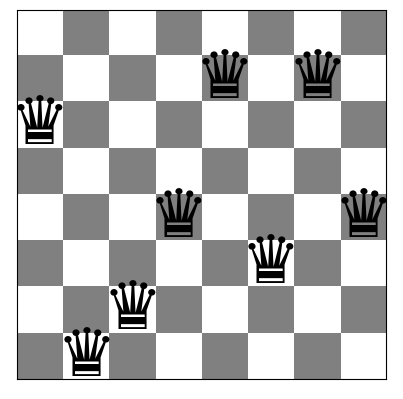

Testing local move: switch_two_columns
[1 7 3 1 6 7 2 5]
Board with 7 conflicts.


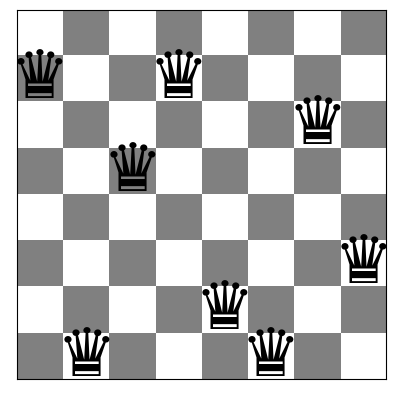

Testing local move: move_two_queens
[5 1 2 2 6 4 0 3]
Board with 5 conflicts.


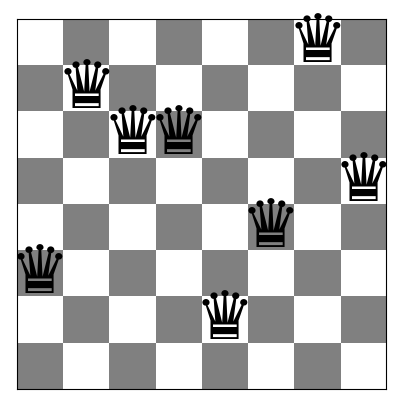

In [75]:
import random
import numpy as np


def move_one_queen_only(board):
    """Move one queen only one square at a time."""
    n = len(board)
    new_board = board.copy()
    rand_queen = random.randint(0, n-1)
    rand_move = random.randint(0, n-1)
    new_board[rand_queen] = rand_move
    return new_board

def switch_two_columns(board):
    """Switch two columns."""
    n = len(board)
    new_board = board.copy()
    column1, column2 = random.sample(range(n), 2)
    for i in range(n):
        if new_board[i] == column1:
            new_board[i] = column1
        elif new_board[i] == column2:
            new_board[i] = column2
    return new_board

def move_two_queens(board):
    """Move two queens at a time."""
    n = len(board)
    new_board = board.copy()
    rand_queen1, rand_queen2 = random.sample(range(n), 2)
    rand_move1, rand_move2 = random.sample(range(n), 2)
    new_board[rand_queen1] = rand_move1
    new_board[rand_queen2] = rand_move2
    return new_board

def stochastic_Hill_Climbing_2(n, verb=True, local_move=None):
    rand_board = random_board(n)

    if verb:
        print("Initially:")
        show_board(rand_board)
        print(f"Queens (left to right) are at rows: {rand_board}")
        print(f"Number of conflicts: {conflicts(rand_board)}\n")

    current_conflicts = conflicts(rand_board)

    while True:
        uphill_conflicts = []
        uphill_conf_array = [[-1] * len(rand_board) for _ in range(len(rand_board))]

        if local_move == 'move_one_queen':
            new_board = move_one_queen_only(rand_board)
        elif local_move == 'switch_two_columns':
            new_board = switch_two_columns(rand_board)
        elif local_move == 'move_two_queens':
            new_board = move_two_queens(rand_board)
        else:
            new_board = rand_board

        new_conf = conflicts(new_board)

        if new_conf < current_conflicts:
            rand_board = new_board
            current_conflicts = new_conf
        else:
            break

    return rand_board

# Test the different local moves for the 8-Queens problem using stochastic hill climbing
moves = ['move_one_queen', 'switch_two_columns', 'move_two_queens']

for move in moves:
    print(f"Testing local move: {move}")
    final_board_8 = stochastic_Hill_Climbing_2(8, verb=False, local_move=move)
    print(final_board_8)
    show_board(final_board_8)


In [ ]:
References:
Stackoverflow
Google

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here